Importing the required libraries:

In [1]:
import torch
import torch.nn as nn
from torch.nn.modules.activation import ReLU
from torch import optim
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

Function for plotting the error graph of test and validation error:

In [2]:
def plotter(lossFun, mode):
    lossFun = np.array(lossFun)
    u = np.arange(start=1, stop=6, step=1)
    plt.xlabel('Epoch number')
    plt.ylabel('Loss Function')
    if mode == 'train':
        plt.title('Loss function for Train data')
    else:
        plt.title('Loss function for Validation data')
    plt.plot(u,lossFun)
    plt.show()

Loading the MNIST handwritting dataset and dividing the train into train and validation. Batch size =32

In [3]:
data = datasets.MNIST('data', train = True, download = True, transform = transforms.ToTensor())
training, validation = random_split(data, [55000, 5000])
trainingData = DataLoader(training, batch_size = 32)
validationData = DataLoader(validation, batch_size = 32)

dataTest = datasets.MNIST('data', train = False, download = True, transform = transforms.ToTensor())
testData = DataLoader(dataTest, batch_size = 32)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



DNN with 2 hidden layer and each layer having 512 neurons: 

In [4]:
modelWith2HL = nn.Sequential(
    nn.Linear(28 * 28, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
)

Using stochastic gradient descent optimizer, and learning rate of 0.01:

In [5]:
optimiser = optim.SGD(modelWith2HL.parameters(), lr = 1e-2)

Using cross entropy loss function:

In [6]:
lossFunction = nn.CrossEntropyLoss()

Training the DNN over 5 epoches and calculating the train, validation loss and validation error:

In [7]:
numberOfEpochs = 5
lossValueTrain = []
lossValueValidation = []
accuracyVal = []
pltTrain = []
pltVal = []
for epochs in range(0, numberOfEpochs):
  
  for batch in trainingData:
    x, y = batch

    b = x.size(0)
    x = x.view(b, -1)

    forwardValue = modelWith2HL(x)

    J = lossFunction(forwardValue, y)

    modelWith2HL.zero_grad()

    J.backward()

    optimiser.step()

    lossValueTrain.append(J.item())



  for batch in validationData:
    x, y = batch

    b = x.size(0)
    x = x.view(b, -1)

    with torch.no_grad():
      forwardValue = modelWith2HL(x)

    J = lossFunction(forwardValue, y)
    
    lossValueValidation.append(J.item())
    accuracyVal.append(y.eq(forwardValue.detach().argmax(dim = 1)).float().mean())

  pltTrain.append(torch.tensor(lossValueTrain).mean())
  pltVal.append(torch.tensor(lossValueValidation).mean())
  print(f'Epoch Number: {epochs + 1}, train Loss: {torch.tensor(lossValueTrain).mean():.2f}, validation Loss: {torch.tensor(lossValueValidation).mean():.2f}, Validation Accuracy: {torch.tensor(accuracyVal).mean():.2f}')



Epoch Number: 1, train Loss: 1.09, validation Loss: 0.42, Validation Accuracy: 0.88
Epoch Number: 2, train Loss: 0.73, validation Loss: 0.37, Validation Accuracy: 0.89
Epoch Number: 3, train Loss: 0.59, validation Loss: 0.34, Validation Accuracy: 0.90
Epoch Number: 4, train Loss: 0.51, validation Loss: 0.31, Validation Accuracy: 0.91
Epoch Number: 5, train Loss: 0.45, validation Loss: 0.30, Validation Accuracy: 0.91


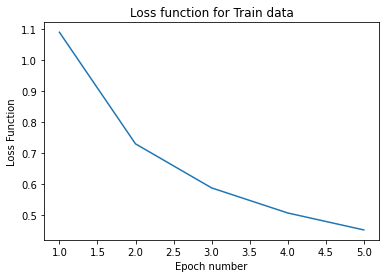

In [8]:
plotter(pltTrain, 'train')

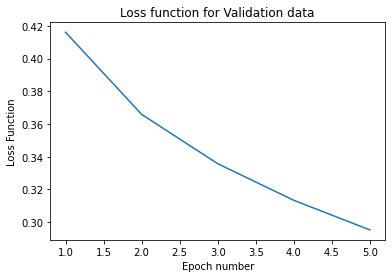

In [9]:
plotter(pltVal, 'val')

Calculating the accuracy for test handwitting samples:

In [10]:
# lossValue = []
accuracyTest = []
for batch in testData:
  x, y = batch

  b = x.size(0)
  x = x.view(b, -1)

  with torch.no_grad():
    forwardValue = modelWith2HL(x)

  # J = lossFunction(forwardValue, y)
  
  # lossValueValidation.append(J.item())
  accuracyTest.append(y.eq(forwardValue.detach().argmax(dim = 1)).float().mean())
print(f'Test Accuracy: {torch.tensor(accuracyTest).mean():.2f}')

Test Accuracy: 0.94


DNN with 3 hidden layers of neurons and each layer with 512 units: 

In [11]:
modelWith3HL = nn.Sequential(
    nn.Linear(28 * 28, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
)

SGD optimizer with learning rate of 0.01 used 

In [12]:
optimiser = optim.SGD(modelWith3HL.parameters(), lr = 1e-2)

Cross entropy loss function used:

In [13]:
lossFunction = nn.CrossEntropyLoss()

Training the model parameters over 5 epoches and calculating train, validation loss: 

In [14]:
numberOfEpochs = 5
pltTrain = []
pltVal = []
for epochs in range(0, numberOfEpochs):
  lossValueTrain = []
  for batch in trainingData:
    x, y = batch

    b = x.size(0)
    x = x.view(b, -1)

    forwardValue = modelWith3HL(x)

    J = lossFunction(forwardValue, y)

    modelWith3HL.zero_grad()

    J.backward()

    optimiser.step()

    lossValueTrain.append(J.item())


  lossValueValidation = []
  accuracy = []
  for batch in validationData:
    x, y = batch

    b = x.size(0)
    x = x.view(b, -1)

    with torch.no_grad():
      forwardValue = modelWith3HL(x)

    J = lossFunction(forwardValue, y)
    
    lossValueValidation.append(J.item())
    accuracy.append(y.eq(forwardValue.detach().argmax(dim = 1)).float().mean())


  pltTrain.append(torch.tensor(lossValueTrain).mean())
  pltVal.append(torch.tensor(lossValueValidation).mean())
  print(f'Epoch Number: {epochs + 1}, train Loss: {torch.tensor(lossValueTrain).mean():.2f}, validation Loss: {torch.tensor(lossValueValidation).mean():.2f}, Validation Accuracy: {torch.tensor(accuracy).mean():.2f}')


Epoch Number: 1, train Loss: 1.51, validation Loss: 0.51, Validation Accuracy: 0.85
Epoch Number: 2, train Loss: 0.41, validation Loss: 0.34, Validation Accuracy: 0.90
Epoch Number: 3, train Loss: 0.31, validation Loss: 0.28, Validation Accuracy: 0.92
Epoch Number: 4, train Loss: 0.26, validation Loss: 0.24, Validation Accuracy: 0.93
Epoch Number: 5, train Loss: 0.22, validation Loss: 0.20, Validation Accuracy: 0.94


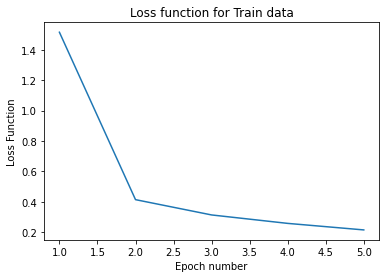

In [15]:
plotter(pltTrain, 'train')

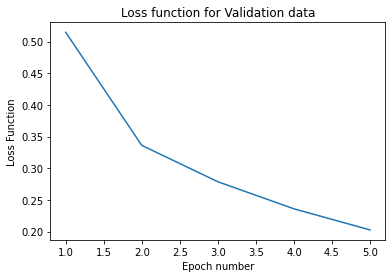

In [16]:
plotter(pltVal, 'val')

Calculating accuracy for DNN with 3 hidden layers of 512 neurons on test data. 

In [17]:
# lossValue = []
accuracyTest = []
for batch in testData:
  x, y = batch

  b = x.size(0)
  x = x.view(b, -1)

  with torch.no_grad():
    forwardValue = modelWith3HL(x)

  # J = lossFunction(forwardValue, y)
  
  # lossValueValidation.append(J.item())
  accuracyTest.append(y.eq(forwardValue.detach().argmax(dim = 1)).float().mean())
print(f'Test Accuracy: {torch.tensor(accuracyTest).mean():.2f}')

Test Accuracy: 0.94


**DNN with 3 layers gives better accuracy as compared to DNN with less (2) hidden layers**

Making CNN model with kernel filter size =3, two hidden layer with 256 neurons and Relu function. 

In [18]:
modelWithCNN = nn.Sequential(
    nn.Conv2d(1, 128, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(100352, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

SGD optimizer used for CNN

In [19]:
optimiser = optim.SGD(modelWithCNN.parameters(), lr = 1e-2)

Cross entropy loss function used in CNN:

In [20]:
lossFunction = nn.CrossEntropyLoss()

Training CNN model over 5 epoches:

In [21]:
numberOfEpochs = 5
pltTrain = []
pltVal = []
for epochs in range(0, numberOfEpochs):
  lossValueTrain = []
  # for batch in trainingData:
  for i, (images, labels) in enumerate(trainingData):

    forwardValue = modelWithCNN(images)

    J = lossFunction(forwardValue, labels)

    modelWithCNN.zero_grad()

    J.backward()

    optimiser.step()

    lossValueTrain.append(J.item())


  lossValueValidation = []
  accuracy = []
  for i, (images, labels) in enumerate(trainingData):
    # x, y = batch

    # b = x.size(0)
    # x = x.view(b, -1)

    with torch.no_grad():
      forwardValue = modelWithCNN(images)

    J = lossFunction(forwardValue, labels)
    
    lossValueValidation.append(J.item())
    accuracy.append(labels.eq(forwardValue.detach().argmax(dim = 1)).float().mean())

  pltTrain.append(torch.tensor(lossValueTrain).mean())
  pltVal.append(torch.tensor(lossValueValidation).mean())
  print(f'Epoch Number: {epochs + 1}, train Loss: {torch.tensor(lossValueTrain).mean():.2f}, validation Loss: {torch.tensor(lossValueValidation).mean():.2f}, Validation Accuracy: {torch.tensor(accuracy).mean():.2f}')


Epoch Number: 1, train Loss: 0.47, validation Loss: 0.24, Validation Accuracy: 0.93
Epoch Number: 2, train Loss: 0.21, validation Loss: 0.16, Validation Accuracy: 0.95
Epoch Number: 3, train Loss: 0.14, validation Loss: 0.12, Validation Accuracy: 0.97
Epoch Number: 4, train Loss: 0.11, validation Loss: 0.09, Validation Accuracy: 0.97
Epoch Number: 5, train Loss: 0.09, validation Loss: 0.08, Validation Accuracy: 0.98


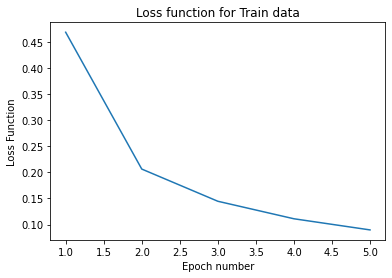

In [22]:
plotter(pltTrain, 'train')

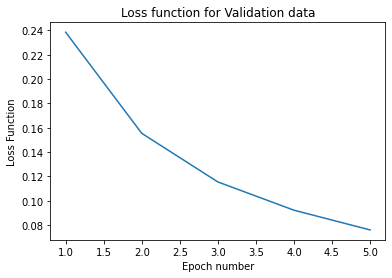

In [23]:
plotter(pltVal, 'val')

Calculating test accuracy for CNN model with one
layer of convolutions (kernel size of 3 × 3 with a 2-D convolutional layer and having 128 filters) followed by two dense layers of 256 neurons.

In [24]:
accuracyTest = []
for i, (images, labels) in enumerate(testData):
  with torch.no_grad():
    forwardValue = modelWithCNN(images)

  accuracyTest.append(labels.eq(forwardValue.detach().argmax(dim = 1)).float().mean())
print(f'Test Accuracy: {torch.tensor(accuracyTest).mean():.2f}')

Test Accuracy: 0.97


Uaing filter kernel of size 5:

Epoch Number: 1, train Loss: 0.42, validation Loss: 0.21, Validation Accuracy: 0.94
Epoch Number: 2, train Loss: 0.18, validation Loss: 0.13, Validation Accuracy: 0.96
Epoch Number: 3, train Loss: 0.12, validation Loss: 0.09, Validation Accuracy: 0.97
Epoch Number: 4, train Loss: 0.09, validation Loss: 0.07, Validation Accuracy: 0.98
Epoch Number: 5, train Loss: 0.07, validation Loss: 0.06, Validation Accuracy: 0.98


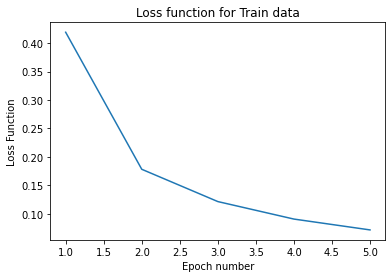

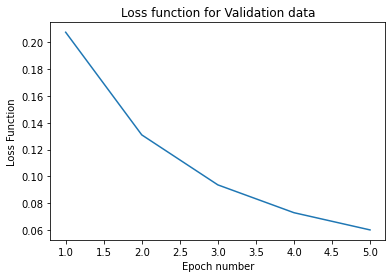

Test Accuracy: 0.97


In [25]:
modelWithCNN = nn.Sequential(
    nn.Conv2d(1, 128, kernel_size=5, stride=1, padding=2),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(100352, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

optimiser = optim.SGD(modelWithCNN.parameters(), lr = 1e-2)
lossFunction = nn.CrossEntropyLoss()
numberOfEpochs = 5
pltTrain = []
pltVal = []
for epochs in range(0, numberOfEpochs):
  lossValueTrain = []
  # for batch in trainingData:
  for i, (images, labels) in enumerate(trainingData):

    forwardValue = modelWithCNN(images)

    J = lossFunction(forwardValue, labels)

    modelWithCNN.zero_grad()

    J.backward()

    optimiser.step()

    lossValueTrain.append(J.item())


  lossValueValidation = []
  accuracy = []
  for i, (images, labels) in enumerate(trainingData):
    # x, y = batch

    # b = x.size(0)
    # x = x.view(b, -1)

    with torch.no_grad():
      forwardValue = modelWithCNN(images)

    J = lossFunction(forwardValue, labels)
    
    lossValueValidation.append(J.item())
    accuracy.append(labels.eq(forwardValue.detach().argmax(dim = 1)).float().mean())

  pltTrain.append(torch.tensor(lossValueTrain).mean())
  pltVal.append(torch.tensor(lossValueValidation).mean())
  print(f'Epoch Number: {epochs + 1}, train Loss: {torch.tensor(lossValueTrain).mean():.2f}, validation Loss: {torch.tensor(lossValueValidation).mean():.2f}, Validation Accuracy: {torch.tensor(accuracy).mean():.2f}')

plotter(pltTrain, 'train')
plotter(pltVal, 'val')
accuracyTest = []
for i, (images, labels) in enumerate(testData):
  with torch.no_grad():
    forwardValue = modelWithCNN(images)

  accuracyTest.append(labels.eq(forwardValue.detach().argmax(dim = 1)).float().mean())
print(f'Test Accuracy: {torch.tensor(accuracyTest).mean():.2f}')

Changing kernel filter size to 7:

Epoch Number: 1, train Loss: 0.45, validation Loss: 0.21, Validation Accuracy: 0.94
Epoch Number: 2, train Loss: 0.18, validation Loss: 0.13, Validation Accuracy: 0.96
Epoch Number: 3, train Loss: 0.12, validation Loss: 0.09, Validation Accuracy: 0.97
Epoch Number: 4, train Loss: 0.08, validation Loss: 0.07, Validation Accuracy: 0.98
Epoch Number: 5, train Loss: 0.07, validation Loss: 0.05, Validation Accuracy: 0.98


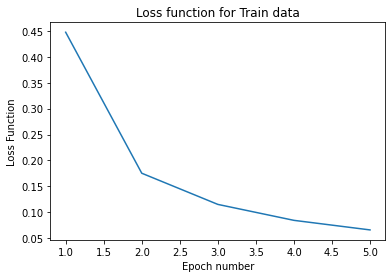

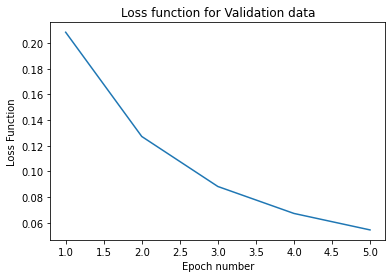

Test Accuracy: 0.98


In [26]:
modelWithCNN = nn.Sequential(
    nn.Conv2d(1, 128, kernel_size=7, stride=1, padding=3),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(100352, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

optimiser = optim.SGD(modelWithCNN.parameters(), lr = 1e-2)
lossFunction = nn.CrossEntropyLoss()
numberOfEpochs = 5
pltTrain = []
pltVal = []
for epochs in range(0, numberOfEpochs):
  lossValueTrain = []
  # for batch in trainingData:
  for i, (images, labels) in enumerate(trainingData):

    forwardValue = modelWithCNN(images)

    J = lossFunction(forwardValue, labels)

    modelWithCNN.zero_grad()

    J.backward()

    optimiser.step()

    lossValueTrain.append(J.item())


  lossValueValidation = []
  accuracy = []
  for i, (images, labels) in enumerate(trainingData):
    # x, y = batch

    # b = x.size(0)
    # x = x.view(b, -1)

    with torch.no_grad():
      forwardValue = modelWithCNN(images)

    J = lossFunction(forwardValue, labels)
    
    lossValueValidation.append(J.item())
    accuracy.append(labels.eq(forwardValue.detach().argmax(dim = 1)).float().mean())

  pltTrain.append(torch.tensor(lossValueTrain).mean())
  pltVal.append(torch.tensor(lossValueValidation).mean())
  print(f'Epoch Number: {epochs + 1}, train Loss: {torch.tensor(lossValueTrain).mean():.2f}, validation Loss: {torch.tensor(lossValueValidation).mean():.2f}, Validation Accuracy: {torch.tensor(accuracy).mean():.2f}')

plotter(pltTrain, 'train')
plotter(pltVal, 'val')
accuracyTest = []
for i, (images, labels) in enumerate(testData):
  with torch.no_grad():
    forwardValue = modelWithCNN(images)

  accuracyTest.append(labels.eq(forwardValue.detach().argmax(dim = 1)).float().mean())
print(f'Test Accuracy: {torch.tensor(accuracyTest).mean():.2f}')

Chaning the dense layer to 128 neurons after convolution layer:

Epoch Number: 1, train Loss: 0.49, validation Loss: 0.25, Validation Accuracy: 0.93
Epoch Number: 2, train Loss: 0.22, validation Loss: 0.17, Validation Accuracy: 0.95
Epoch Number: 3, train Loss: 0.16, validation Loss: 0.13, Validation Accuracy: 0.96
Epoch Number: 4, train Loss: 0.12, validation Loss: 0.10, Validation Accuracy: 0.97
Epoch Number: 5, train Loss: 0.10, validation Loss: 0.08, Validation Accuracy: 0.98


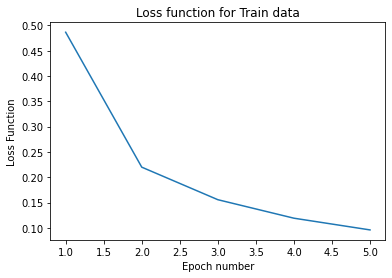

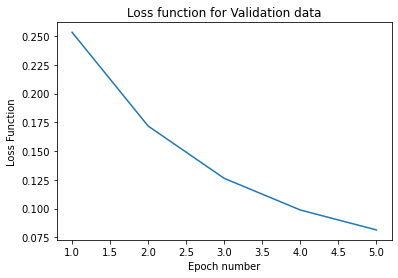

Test Accuracy: 0.97


In [27]:
modelWithCNN = nn.Sequential(
    nn.Conv2d(1, 128, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(100352, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimiser = optim.SGD(modelWithCNN.parameters(), lr = 1e-2)
lossFunction = nn.CrossEntropyLoss()
numberOfEpochs = 5
pltTrain = []
pltVal = []
for epochs in range(0, numberOfEpochs):
  lossValueTrain = []
  # for batch in trainingData:
  for i, (images, labels) in enumerate(trainingData):

    forwardValue = modelWithCNN(images)

    J = lossFunction(forwardValue, labels)

    modelWithCNN.zero_grad()

    J.backward()

    optimiser.step()

    lossValueTrain.append(J.item())


  lossValueValidation = []
  accuracy = []
  for i, (images, labels) in enumerate(trainingData):
    # x, y = batch

    # b = x.size(0)
    # x = x.view(b, -1)

    with torch.no_grad():
      forwardValue = modelWithCNN(images)

    J = lossFunction(forwardValue, labels)
    
    lossValueValidation.append(J.item())
    accuracy.append(labels.eq(forwardValue.detach().argmax(dim = 1)).float().mean())

  pltTrain.append(torch.tensor(lossValueTrain).mean())
  pltVal.append(torch.tensor(lossValueValidation).mean())
  print(f'Epoch Number: {epochs + 1}, train Loss: {torch.tensor(lossValueTrain).mean():.2f}, validation Loss: {torch.tensor(lossValueValidation).mean():.2f}, Validation Accuracy: {torch.tensor(accuracy).mean():.2f}')

plotter(pltTrain, 'train')
plotter(pltVal, 'val')
accuracyTest = []
for i, (images, labels) in enumerate(testData):
  with torch.no_grad():
    forwardValue = modelWithCNN(images)

  accuracyTest.append(labels.eq(forwardValue.detach().argmax(dim = 1)).float().mean())
print(f'Test Accuracy: {torch.tensor(accuracyTest).mean():.2f}')

Changing the dense layer to 512 neurons after the convolution layer:

Epoch Number: 1, train Loss: 0.46, validation Loss: 0.23, Validation Accuracy: 0.93
Epoch Number: 2, train Loss: 0.20, validation Loss: 0.15, Validation Accuracy: 0.96
Epoch Number: 3, train Loss: 0.14, validation Loss: 0.11, Validation Accuracy: 0.97
Epoch Number: 4, train Loss: 0.10, validation Loss: 0.09, Validation Accuracy: 0.97
Epoch Number: 5, train Loss: 0.08, validation Loss: 0.07, Validation Accuracy: 0.98


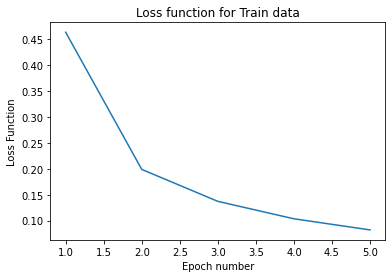

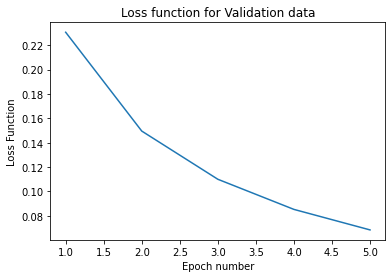

Test Accuracy: 0.97


In [28]:
modelWithCNN = nn.Sequential(
    nn.Conv2d(1, 128, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(100352, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
)

optimiser = optim.SGD(modelWithCNN.parameters(), lr = 1e-2)
lossFunction = nn.CrossEntropyLoss()
numberOfEpochs = 5
pltTrain = []
pltVal = []
for epochs in range(0, numberOfEpochs):
  lossValueTrain = []
  # for batch in trainingData:
  for i, (images, labels) in enumerate(trainingData):

    forwardValue = modelWithCNN(images)

    J = lossFunction(forwardValue, labels)

    modelWithCNN.zero_grad()

    J.backward()

    optimiser.step()

    lossValueTrain.append(J.item())


  lossValueValidation = []
  accuracy = []
  for i, (images, labels) in enumerate(trainingData):
    # x, y = batch

    # b = x.size(0)
    # x = x.view(b, -1)

    with torch.no_grad():
      forwardValue = modelWithCNN(images)

    J = lossFunction(forwardValue, labels)
    
    lossValueValidation.append(J.item())
    accuracy.append(labels.eq(forwardValue.detach().argmax(dim = 1)).float().mean())

  pltTrain.append(torch.tensor(lossValueTrain).mean())
  pltVal.append(torch.tensor(lossValueValidation).mean())
  print(f'Epoch Number: {epochs + 1}, train Loss: {torch.tensor(lossValueTrain).mean():.2f}, validation Loss: {torch.tensor(lossValueValidation).mean():.2f}, Validation Accuracy: {torch.tensor(accuracy).mean():.2f}')

plotter(pltTrain, 'train')
plotter(pltVal, 'val')
accuracyTest = []
for i, (images, labels) in enumerate(testData):
  with torch.no_grad():
    forwardValue = modelWithCNN(images)

  accuracyTest.append(labels.eq(forwardValue.detach().argmax(dim = 1)).float().mean())
print(f'Test Accuracy: {torch.tensor(accuracyTest).mean():.2f}')

Training CNN takes much more time as compared to DNN. 

# The test accuracy increased in CNN by large margin even when compared to DNN with 3 hidden layers and more neurons 
# In case of CNN increasing the kernel filter size increased the accuracy but there was less change upon increasing the number of neurons in Dense hidden layer in CNN. Ideally accuracy should increase with both increase in number of neurons and kernel size as the model complexity increases. 